In [1]:
import pysplit
import pandas as pd
import numpy as np
from wrf import getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import matplotlib as mpl
import xarray as xr
from itertools import product
import matplotlib.patheffects as path_effects

In [2]:
def regions_to_str(number):
    
    m = {
         1: 'West Coast',
         3: 'Central Interior',
         4: 'North Slope',
         5: 'Northeast Interior',
         6: 'Southeast Interior'
        }

    try:
        out = m[number]
        return out
    
    except:
        raise ValueError('Not a region')

In [3]:
maskfile = xr.open_dataset('/glade/scratch/molina/basile/maskfile.nc')
land=np.ma.masked_where(maskfile.land.values==1, maskfile.land.values)
goa=np.ma.masked_where(maskfile.goa.values==1, maskfile.goa.values)
bs=np.ma.masked_where(maskfile.bs.values==1, maskfile.bs.values)
ao=np.ma.masked_where(maskfile.ao.values==1, maskfile.ao.values)

In [4]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").frequency
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").frequency
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").frequency
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").frequency
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").frequency

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").frequency
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").frequency
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").frequency
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").frequency
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").frequency

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").frequency
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").frequency
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").frequency
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").frequency
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").frequency

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion1_{which_climate}.nc").frequency
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion3_{which_climate}.nc").frequency
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion4_{which_climate}.nc").frequency
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion5_{which_climate}.nc").frequency
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion6_{which_climate}.nc").frequency

# may-jun

reg1c_mj=ds1+ds16
reg3c_mj=ds2+ds17
reg4c_mj=ds3+ds18
reg5c_mj=ds4+ds19
reg6c_mj=ds5+ds20

# jul-aug

reg1c_ja=ds6+ds11
reg3c_ja=ds7+ds12
reg4c_ja=ds8+ds13
reg5c_ja=ds9+ds14
reg6c_ja=ds10+ds15

In [5]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").frequency
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").frequency
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").frequency
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").frequency
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").frequency

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").frequency
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").frequency
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").frequency
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").frequency
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").frequency

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").frequency
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").frequency
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").frequency
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").frequency
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").frequency

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion1_{which_climate}.nc").frequency
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion3_{which_climate}.nc").frequency
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion4_{which_climate}.nc").frequency
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion5_{which_climate}.nc").frequency
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion6_{which_climate}.nc").frequency

# may-jun
reg1f_mj=ds1+ds16
reg3f_mj=ds2+ds17
reg4f_mj=ds3+ds18
reg5f_mj=ds4+ds19
reg6f_mj=ds5+ds20

# jul-aug

reg1f_ja=ds6+ds11
reg3f_ja=ds7+ds12
reg4f_ja=ds8+ds13
reg5f_ja=ds9+ds14
reg6f_ja=ds10+ds15

In [6]:
land_1c_mj=np.nansum(np.ma.masked_where(land.mask==False, reg1c_mj))/reg1c_mj.values.sum()*100
land_2c_mj=np.nansum(np.ma.masked_where(land.mask==False, reg3c_mj))/reg3c_mj.values.sum()*100
land_3c_mj=np.nansum(np.ma.masked_where(land.mask==False, reg4c_mj))/reg4c_mj.values.sum()*100
land_4c_mj=np.nansum(np.ma.masked_where(land.mask==False, reg5c_mj))/reg5c_mj.values.sum()*100
land_5c_mj=np.nansum(np.ma.masked_where(land.mask==False, reg6c_mj))/reg6c_mj.values.sum()*100

land_1f_mj=np.nansum(np.ma.masked_where(land.mask==False, reg1f_mj))/reg1f_mj.values.sum()*100
land_2f_mj=np.nansum(np.ma.masked_where(land.mask==False, reg3f_mj))/reg3f_mj.values.sum()*100
land_3f_mj=np.nansum(np.ma.masked_where(land.mask==False, reg4f_mj))/reg4f_mj.values.sum()*100
land_4f_mj=np.nansum(np.ma.masked_where(land.mask==False, reg5f_mj))/reg5f_mj.values.sum()*100
land_5f_mj=np.nansum(np.ma.masked_where(land.mask==False, reg6f_mj))/reg6f_mj.values.sum()*100

land_1c_ja=np.nansum(np.ma.masked_where(land.mask==False, reg1c_ja))/reg1c_ja.values.sum()*100
land_2c_ja=np.nansum(np.ma.masked_where(land.mask==False, reg3c_ja))/reg3c_ja.values.sum()*100
land_3c_ja=np.nansum(np.ma.masked_where(land.mask==False, reg4c_ja))/reg4c_ja.values.sum()*100
land_4c_ja=np.nansum(np.ma.masked_where(land.mask==False, reg5c_ja))/reg5c_ja.values.sum()*100
land_5c_ja=np.nansum(np.ma.masked_where(land.mask==False, reg6c_ja))/reg6c_ja.values.sum()*100

land_1f_ja=np.nansum(np.ma.masked_where(land.mask==False, reg1f_ja))/reg1f_ja.values.sum()*100
land_2f_ja=np.nansum(np.ma.masked_where(land.mask==False, reg3f_ja))/reg3f_ja.values.sum()*100
land_3f_ja=np.nansum(np.ma.masked_where(land.mask==False, reg4f_ja))/reg4f_ja.values.sum()*100
land_4f_ja=np.nansum(np.ma.masked_where(land.mask==False, reg5f_ja))/reg5f_ja.values.sum()*100
land_5f_ja=np.nansum(np.ma.masked_where(land.mask==False, reg6f_ja))/reg6f_ja.values.sum()*100

# %----------

ao_1c_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg1c_mj))/reg1c_mj.values.sum()*100
ao_2c_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg3c_mj))/reg3c_mj.values.sum()*100
ao_3c_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg4c_mj))/reg4c_mj.values.sum()*100
ao_4c_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg5c_mj))/reg5c_mj.values.sum()*100
ao_5c_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg6c_mj))/reg6c_mj.values.sum()*100

ao_1f_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg1f_mj))/reg1f_mj.values.sum()*100
ao_2f_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg3f_mj))/reg3f_mj.values.sum()*100
ao_3f_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg4f_mj))/reg4f_mj.values.sum()*100
ao_4f_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg5f_mj))/reg5f_mj.values.sum()*100
ao_5f_mj=np.nansum(np.ma.masked_where(ao.mask==False, reg6f_mj))/reg6f_mj.values.sum()*100

ao_1c_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg1c_ja))/reg1c_ja.values.sum()*100
ao_2c_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg3c_ja))/reg3c_ja.values.sum()*100
ao_3c_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg4c_ja))/reg4c_ja.values.sum()*100
ao_4c_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg5c_ja))/reg5c_ja.values.sum()*100
ao_5c_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg6c_ja))/reg6c_ja.values.sum()*100

ao_1f_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg1f_ja))/reg1f_ja.values.sum()*100
ao_2f_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg3f_ja))/reg3f_ja.values.sum()*100
ao_3f_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg4f_ja))/reg4f_ja.values.sum()*100
ao_4f_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg5f_ja))/reg5f_ja.values.sum()*100
ao_5f_ja=np.nansum(np.ma.masked_where(ao.mask==False, reg6f_ja))/reg6f_ja.values.sum()*100

# %----------

goa_1c_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg1c_mj))/reg1c_mj.values.sum()*100
goa_2c_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg3c_mj))/reg3c_mj.values.sum()*100
goa_3c_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg4c_mj))/reg4c_mj.values.sum()*100
goa_4c_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg5c_mj))/reg5c_mj.values.sum()*100
goa_5c_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg6c_mj))/reg6c_mj.values.sum()*100

goa_1f_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg1f_mj))/reg1f_mj.values.sum()*100
goa_2f_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg3f_mj))/reg3f_mj.values.sum()*100
goa_3f_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg4f_mj))/reg4f_mj.values.sum()*100
goa_4f_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg5f_mj))/reg5f_mj.values.sum()*100
goa_5f_mj=np.nansum(np.ma.masked_where(goa.mask==False, reg6f_mj))/reg6f_mj.values.sum()*100

goa_1c_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg1c_ja))/reg1c_ja.values.sum()*100
goa_2c_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg3c_ja))/reg3c_ja.values.sum()*100
goa_3c_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg4c_ja))/reg4c_ja.values.sum()*100
goa_4c_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg5c_ja))/reg5c_ja.values.sum()*100
goa_5c_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg6c_ja))/reg6c_ja.values.sum()*100

goa_1f_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg1f_ja))/reg1f_ja.values.sum()*100
goa_2f_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg3f_ja))/reg3f_ja.values.sum()*100
goa_3f_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg4f_ja))/reg4f_ja.values.sum()*100
goa_4f_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg5f_ja))/reg5f_ja.values.sum()*100
goa_5f_ja=np.nansum(np.ma.masked_where(goa.mask==False, reg6f_ja))/reg6f_ja.values.sum()*100

# %----------

bs_1c_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg1c_mj))/reg1c_mj.values.sum()*100
bs_2c_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg3c_mj))/reg3c_mj.values.sum()*100
bs_3c_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg4c_mj))/reg4c_mj.values.sum()*100
bs_4c_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg5c_mj))/reg5c_mj.values.sum()*100
bs_5c_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg6c_mj))/reg6c_mj.values.sum()*100

bs_1f_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg1f_mj))/reg1f_mj.values.sum()*100
bs_2f_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg3f_mj))/reg3f_mj.values.sum()*100
bs_3f_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg4f_mj))/reg4f_mj.values.sum()*100
bs_4f_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg5f_mj))/reg5f_mj.values.sum()*100
bs_5f_mj=np.nansum(np.ma.masked_where(bs.mask==False, reg6f_mj))/reg6f_mj.values.sum()*100

bs_1c_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg1c_ja))/reg1c_ja.values.sum()*100
bs_2c_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg3c_ja))/reg3c_ja.values.sum()*100
bs_3c_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg4c_ja))/reg4c_ja.values.sum()*100
bs_4c_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg5c_ja))/reg5c_ja.values.sum()*100
bs_5c_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg6c_ja))/reg6c_ja.values.sum()*100

bs_1f_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg1f_ja))/reg1f_ja.values.sum()*100
bs_2f_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg3f_ja))/reg3f_ja.values.sum()*100
bs_3f_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg4f_ja))/reg4f_ja.values.sum()*100
bs_4f_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg5f_ja))/reg5f_ja.values.sum()*100
bs_5f_ja=np.nansum(np.ma.masked_where(bs.mask==False, reg6f_ja))/reg6f_ja.values.sum()*100

In [7]:
bars1_l_mj=[goa_1c_mj,goa_2c_mj,goa_3c_mj,goa_4c_mj,goa_5c_mj]
bars2_l_mj=[bs_1c_mj,bs_2c_mj,bs_3c_mj,bs_4c_mj,bs_5c_mj]
bars3_l_mj=[ao_1c_mj,ao_2c_mj,ao_3c_mj,ao_4c_mj,ao_5c_mj]
bars4_l_mj=[land_1c_mj,land_2c_mj,land_3c_mj,land_4c_mj,land_5c_mj]

bars5_l_mj=[goa_1f_mj,goa_2f_mj,goa_3f_mj,goa_4f_mj,goa_5f_mj]
bars6_l_mj=[bs_1f_mj,bs_2f_mj,bs_3f_mj,bs_4f_mj,bs_5f_mj]
bars7_l_mj=[ao_1f_mj,ao_2f_mj,ao_3f_mj,ao_4f_mj,ao_5f_mj]
bars8_l_mj=[land_1f_mj,land_2f_mj,land_3f_mj,land_4f_mj,land_5f_mj]

# %----------

bars1_l_ja=[goa_1c_ja,goa_2c_ja,goa_3c_ja,goa_4c_ja,goa_5c_ja]
bars2_l_ja=[bs_1c_ja,bs_2c_ja,bs_3c_ja,bs_4c_ja,bs_5c_ja]
bars3_l_ja=[ao_1c_ja,ao_2c_ja,ao_3c_ja,ao_4c_ja,ao_5c_ja]
bars4_l_ja=[land_1c_ja,land_2c_ja,land_3c_ja,land_4c_ja,land_5c_ja]

bars5_l_ja=[goa_1f_ja,goa_2f_ja,goa_3f_ja,goa_4f_ja,goa_5f_ja]
bars6_l_ja=[bs_1f_ja,bs_2f_ja,bs_3f_ja,bs_4f_ja,bs_5f_ja]
bars7_l_ja=[ao_1f_ja,ao_2f_ja,ao_3f_ja,ao_4f_ja,ao_5f_ja]
bars8_l_ja=[land_1f_ja,land_2f_ja,land_3f_ja,land_4f_ja,land_5f_ja]

# %----------

names = [regions_to_str(1)+' (HIST)',regions_to_str(1)+' (PGW)',
         '',
         regions_to_str(3)+' (HIST)',regions_to_str(3)+' (PGW)',
         '',
         regions_to_str(4)+' (HIST)',regions_to_str(4)+' (PGW)',
         '',
         regions_to_str(5)+' (HIST)',regions_to_str(5)+' (PGW)',
         '',
         regions_to_str(6)+' (HIST)',regions_to_str(6)+' (PGW)']

# %----------

bars12_l_mj = np.add(bars1_l_mj, bars2_l_mj).tolist()
bars13_l_mj = np.add(bars12_l_mj, bars3_l_mj).tolist()

bars56_l_mj = np.add(bars5_l_mj, bars6_l_mj).tolist()
bars57_l_mj = np.add(bars56_l_mj, bars7_l_mj).tolist()

# %----------

bars12_l_ja = np.add(bars1_l_ja, bars2_l_ja).tolist()
bars13_l_ja = np.add(bars12_l_ja, bars3_l_ja).tolist()

bars56_l_ja = np.add(bars5_l_ja, bars6_l_ja).tolist()
bars57_l_ja = np.add(bars56_l_ja, bars7_l_ja).tolist()

In [8]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion1_{which_climate}.nc")
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion3_{which_climate}.nc")
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion4_{which_climate}.nc")
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion5_{which_climate}.nc")
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion6_{which_climate}.nc")

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion1_{which_climate}.nc")
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion3_{which_climate}.nc")
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion4_{which_climate}.nc")
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion5_{which_climate}.nc")
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion6_{which_climate}.nc")

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion1_{which_climate}.nc")
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion3_{which_climate}.nc")
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion4_{which_climate}.nc")
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion5_{which_climate}.nc")
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion6_{which_climate}.nc")

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion1_{which_climate}.nc")
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion3_{which_climate}.nc")
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion4_{which_climate}.nc")
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion5_{which_climate}.nc")
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion6_{which_climate}.nc")

# %----------

land_1c_mj=np.hstack([ds1.land_pointsx,ds16.land_pointsx]).shape[0]
land_3c_mj=np.hstack([ds2.land_pointsx,ds17.land_pointsx]).shape[0]
land_4c_mj=np.hstack([ds3.land_pointsx,ds18.land_pointsx]).shape[0]
land_5c_mj=np.hstack([ds4.land_pointsx,ds19.land_pointsx]).shape[0]
land_6c_mj=np.hstack([ds5.land_pointsx,ds20.land_pointsx]).shape[0]

goa_1c_mj=np.hstack([ds1.goa_pointsx,ds16.goa_pointsx]).shape[0]
goa_3c_mj=np.hstack([ds2.goa_pointsx,ds17.goa_pointsx]).shape[0]
goa_4c_mj=np.hstack([ds3.goa_pointsx,ds18.goa_pointsx]).shape[0]
goa_5c_mj=np.hstack([ds4.goa_pointsx,ds19.goa_pointsx]).shape[0]
goa_6c_mj=np.hstack([ds5.goa_pointsx,ds20.goa_pointsx]).shape[0]

ao_1c_mj=np.hstack([ds1.ao_pointsx,ds16.ao_pointsx]).shape[0]
ao_3c_mj=np.hstack([ds2.ao_pointsx,ds17.ao_pointsx]).shape[0]
ao_4c_mj=np.hstack([ds3.ao_pointsx,ds18.ao_pointsx]).shape[0]
ao_5c_mj=np.hstack([ds4.ao_pointsx,ds19.ao_pointsx]).shape[0]
ao_6c_mj=np.hstack([ds5.ao_pointsx,ds20.ao_pointsx]).shape[0]

bs_1c_mj=np.hstack([ds1.bs_pointsx,ds16.bs_pointsx]).shape[0]
bs_3c_mj=np.hstack([ds2.bs_pointsx,ds17.bs_pointsx]).shape[0]
bs_4c_mj=np.hstack([ds3.bs_pointsx,ds18.bs_pointsx]).shape[0]
bs_5c_mj=np.hstack([ds4.bs_pointsx,ds19.bs_pointsx]).shape[0]
bs_6c_mj=np.hstack([ds5.bs_pointsx,ds20.bs_pointsx]).shape[0]

# %----------

land_1c_ja=np.hstack([ds6.land_pointsx,ds11.land_pointsx]).shape[0]
land_3c_ja=np.hstack([ds7.land_pointsx,ds12.land_pointsx]).shape[0]
land_4c_ja=np.hstack([ds8.land_pointsx,ds13.land_pointsx]).shape[0]
land_5c_ja=np.hstack([ds9.land_pointsx,ds14.land_pointsx]).shape[0]
land_6c_ja=np.hstack([ds10.land_pointsx,ds15.land_pointsx]).shape[0]

goa_1c_ja=np.hstack([ds6.goa_pointsx,ds11.goa_pointsx]).shape[0]
goa_3c_ja=np.hstack([ds7.goa_pointsx,ds12.goa_pointsx]).shape[0]
goa_4c_ja=np.hstack([ds8.goa_pointsx,ds13.goa_pointsx]).shape[0]
goa_5c_ja=np.hstack([ds9.goa_pointsx,ds14.goa_pointsx]).shape[0]
goa_6c_ja=np.hstack([ds10.goa_pointsx,ds15.goa_pointsx]).shape[0]

ao_1c_ja=np.hstack([ds6.ao_pointsx,ds11.ao_pointsx]).shape[0]
ao_3c_ja=np.hstack([ds7.ao_pointsx,ds12.ao_pointsx]).shape[0]
ao_4c_ja=np.hstack([ds8.ao_pointsx,ds13.ao_pointsx]).shape[0]
ao_5c_ja=np.hstack([ds9.ao_pointsx,ds14.ao_pointsx]).shape[0]
ao_6c_ja=np.hstack([ds10.ao_pointsx,ds15.ao_pointsx]).shape[0]

bs_1c_ja=np.hstack([ds6.bs_pointsx,ds11.bs_pointsx]).shape[0]
bs_3c_ja=np.hstack([ds7.bs_pointsx,ds12.bs_pointsx]).shape[0]
bs_4c_ja=np.hstack([ds8.bs_pointsx,ds13.bs_pointsx]).shape[0]
bs_5c_ja=np.hstack([ds9.bs_pointsx,ds14.bs_pointsx]).shape[0]
bs_6c_ja=np.hstack([ds10.bs_pointsx,ds15.bs_pointsx]).shape[0]

# %----------

none_1c_mjx=np.hstack([ds1.none_pointsx,ds16.none_pointsx])
none_3c_mjx=np.hstack([ds2.none_pointsx,ds17.none_pointsx])
none_4c_mjx=np.hstack([ds3.none_pointsx,ds18.none_pointsx])
none_5c_mjx=np.hstack([ds4.none_pointsx,ds19.none_pointsx])
none_6c_mjx=np.hstack([ds5.none_pointsx,ds20.none_pointsx])

none_1c_jax=np.hstack([ds6.none_pointsx,ds11.none_pointsx])
none_3c_jax=np.hstack([ds7.none_pointsx,ds12.none_pointsx])
none_4c_jax=np.hstack([ds8.none_pointsx,ds13.none_pointsx])
none_5c_jax=np.hstack([ds9.none_pointsx,ds14.none_pointsx])
none_6c_jax=np.hstack([ds10.none_pointsx,ds15.none_pointsx])

none_1c_mjy=np.hstack([ds1.none_pointsy,ds16.none_pointsy])
none_3c_mjy=np.hstack([ds2.none_pointsy,ds17.none_pointsy])
none_4c_mjy=np.hstack([ds3.none_pointsy,ds18.none_pointsy])
none_5c_mjy=np.hstack([ds4.none_pointsy,ds19.none_pointsy])
none_6c_mjy=np.hstack([ds5.none_pointsy,ds20.none_pointsy])

none_1c_jay=np.hstack([ds6.none_pointsy,ds11.none_pointsy])
none_3c_jay=np.hstack([ds7.none_pointsy,ds12.none_pointsy])
none_4c_jay=np.hstack([ds8.none_pointsy,ds13.none_pointsy])
none_5c_jay=np.hstack([ds9.none_pointsy,ds14.none_pointsy])
none_6c_jay=np.hstack([ds10.none_pointsy,ds15.none_pointsy])

# %----------

none_goa_1c_mj=0
none_bs_1c_mj=0
none_ao_1c_mj=0
for i,j in zip(none_1c_mjx, none_1c_mjy):
    if j>=66.075:
        none_ao_1c_mj+=1
    if j<66.075 and i<-155:
        none_bs_1c_mj+=1
    if j<66.075 and i>-155:
        none_goa_1c_mj+=1
        
none_goa_3c_mj=0
none_bs_3c_mj=0
none_ao_3c_mj=0
for i,j in zip(none_3c_mjx, none_3c_mjy):
    if j>=66.075:
        none_ao_3c_mj+=1
    if j<66.075 and i<-155:
        none_bs_3c_mj+=1
    if j<66.075 and i>-155:
        none_goa_3c_mj+=1
        
none_goa_4c_mj=0
none_bs_4c_mj=0
none_ao_4c_mj=0
for i,j in zip(none_4c_mjx, none_4c_mjy):
    if j>=66.075:
        none_ao_4c_mj+=1
    if j<66.075 and i<-155:
        none_bs_4c_mj+=1
    if j<66.075 and i>-155:
        none_goa_4c_mj+=1
        
none_goa_5c_mj=0
none_bs_5c_mj=0
none_ao_5c_mj=0
for i,j in zip(none_5c_mjx, none_5c_mjy):
    if j>=66.075:
        none_ao_5c_mj+=1
    if j<66.075 and i<-155:
        none_bs_5c_mj+=1
    if j<66.075 and i>-155:
        none_goa_5c_mj+=1
        
none_goa_6c_mj=0
none_bs_6c_mj=0
none_ao_6c_mj=0
for i,j in zip(none_6c_mjx, none_6c_mjy):
    if j>=66.075:
        none_ao_6c_mj+=1
    if j<66.075 and i<-155:
        none_bs_6c_mj+=1
    if j<66.075 and i>-155:
        none_goa_6c_mj+=1
        
# %----------

none_goa_1c_ja=0
none_bs_1c_ja=0
none_ao_1c_ja=0
for i,j in zip(none_1c_jax, none_1c_jay):
    if j>=66.075:
        none_ao_1c_ja+=1
    if j<66.075 and i<-155:
        none_bs_1c_ja+=1
    if j<66.075 and i>-155:
        none_goa_1c_ja+=1
        
none_goa_3c_ja=0
none_bs_3c_ja=0
none_ao_3c_ja=0
for i,j in zip(none_3c_jax, none_3c_jay):
    if j>=66.075:
        none_ao_3c_ja+=1
    if j<66.075 and i<-155:
        none_bs_3c_ja+=1
    if j<66.075 and i>-155:
        none_goa_3c_ja+=1
        
none_goa_4c_ja=0
none_bs_4c_ja=0
none_ao_4c_ja=0
for i,j in zip(none_4c_jax, none_4c_jay):
    if j>=66.075:
        none_ao_4c_ja+=1
    if j<66.075 and i<-155:
        none_bs_4c_ja+=1
    if j<66.075 and i>-155:
        none_goa_4c_ja+=1
        
none_goa_5c_ja=0
none_bs_5c_ja=0
none_ao_5c_ja=0
for i,j in zip(none_5c_jax, none_5c_jay):
    if j>=66.075:
        none_ao_5c_ja+=1
    if j<66.075 and i<-155:
        none_bs_5c_ja+=1
    if j<66.075 and i>-155:
        none_goa_5c_ja+=1
        
none_goa_6c_ja=0
none_bs_6c_ja=0
none_ao_6c_ja=0
for i,j in zip(none_6c_jax, none_6c_jay):
    if j>=66.075:
        none_ao_6c_ja+=1
    if j<66.075 and i<-155:
        none_bs_6c_ja+=1
    if j<66.075 and i>-155:
        none_goa_6c_ja+=1

In [9]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion1_{which_climate}.nc")
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion3_{which_climate}.nc")
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion4_{which_climate}.nc")
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion5_{which_climate}.nc")
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion6_{which_climate}.nc")

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion1_{which_climate}.nc")
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion3_{which_climate}.nc")
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion4_{which_climate}.nc")
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion5_{which_climate}.nc")
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion6_{which_climate}.nc")

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion1_{which_climate}.nc")
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion3_{which_climate}.nc")
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion4_{which_climate}.nc")
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion5_{which_climate}.nc")
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion6_{which_climate}.nc")

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion1_{which_climate}.nc")
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion3_{which_climate}.nc")
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion4_{which_climate}.nc")
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion5_{which_climate}.nc")
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_may_subregion6_{which_climate}.nc")

# %----------

land_1f_mj=np.hstack([ds1.land_pointsx,ds16.land_pointsx]).shape[0]
land_3f_mj=np.hstack([ds2.land_pointsx,ds17.land_pointsx]).shape[0]
land_4f_mj=np.hstack([ds3.land_pointsx,ds18.land_pointsx]).shape[0]
land_5f_mj=np.hstack([ds4.land_pointsx,ds19.land_pointsx]).shape[0]
land_6f_mj=np.hstack([ds5.land_pointsx,ds20.land_pointsx]).shape[0]

goa_1f_mj=np.hstack([ds1.goa_pointsx,ds16.goa_pointsx]).shape[0]
goa_3f_mj=np.hstack([ds2.goa_pointsx,ds17.goa_pointsx]).shape[0]
goa_4f_mj=np.hstack([ds3.goa_pointsx,ds18.goa_pointsx]).shape[0]
goa_5f_mj=np.hstack([ds4.goa_pointsx,ds19.goa_pointsx]).shape[0]
goa_6f_mj=np.hstack([ds5.goa_pointsx,ds20.goa_pointsx]).shape[0]

ao_1f_mj=np.hstack([ds1.ao_pointsx,ds16.ao_pointsx]).shape[0]
ao_3f_mj=np.hstack([ds2.ao_pointsx,ds17.ao_pointsx]).shape[0]
ao_4f_mj=np.hstack([ds3.ao_pointsx,ds18.ao_pointsx]).shape[0]
ao_5f_mj=np.hstack([ds4.ao_pointsx,ds19.ao_pointsx]).shape[0]
ao_6f_mj=np.hstack([ds5.ao_pointsx,ds20.ao_pointsx]).shape[0]

bs_1f_mj=np.hstack([ds1.bs_pointsx,ds16.bs_pointsx]).shape[0]
bs_3f_mj=np.hstack([ds2.bs_pointsx,ds17.bs_pointsx]).shape[0]
bs_4f_mj=np.hstack([ds3.bs_pointsx,ds18.bs_pointsx]).shape[0]
bs_5f_mj=np.hstack([ds4.bs_pointsx,ds19.bs_pointsx]).shape[0]
bs_6f_mj=np.hstack([ds5.bs_pointsx,ds20.bs_pointsx]).shape[0]

# %----------

land_1f_ja=np.hstack([ds6.land_pointsx,ds11.land_pointsx]).shape[0]
land_3f_ja=np.hstack([ds7.land_pointsx,ds12.land_pointsx]).shape[0]
land_4f_ja=np.hstack([ds8.land_pointsx,ds13.land_pointsx]).shape[0]
land_5f_ja=np.hstack([ds9.land_pointsx,ds14.land_pointsx]).shape[0]
land_6f_ja=np.hstack([ds10.land_pointsx,ds15.land_pointsx]).shape[0]

goa_1f_ja=np.hstack([ds6.goa_pointsx,ds11.goa_pointsx]).shape[0]
goa_3f_ja=np.hstack([ds7.goa_pointsx,ds12.goa_pointsx]).shape[0]
goa_4f_ja=np.hstack([ds8.goa_pointsx,ds13.goa_pointsx]).shape[0]
goa_5f_ja=np.hstack([ds9.goa_pointsx,ds14.goa_pointsx]).shape[0]
goa_6f_ja=np.hstack([ds10.goa_pointsx,ds15.goa_pointsx]).shape[0]

ao_1f_ja=np.hstack([ds6.ao_pointsx,ds11.ao_pointsx]).shape[0]
ao_3f_ja=np.hstack([ds7.ao_pointsx,ds12.ao_pointsx]).shape[0]
ao_4f_ja=np.hstack([ds8.ao_pointsx,ds13.ao_pointsx]).shape[0]
ao_5f_ja=np.hstack([ds9.ao_pointsx,ds14.ao_pointsx]).shape[0]
ao_6f_ja=np.hstack([ds10.ao_pointsx,ds15.ao_pointsx]).shape[0]

bs_1f_ja=np.hstack([ds6.bs_pointsx,ds11.bs_pointsx]).shape[0]
bs_3f_ja=np.hstack([ds7.bs_pointsx,ds12.bs_pointsx]).shape[0]
bs_4f_ja=np.hstack([ds8.bs_pointsx,ds13.bs_pointsx]).shape[0]
bs_5f_ja=np.hstack([ds9.bs_pointsx,ds14.bs_pointsx]).shape[0]
bs_6f_ja=np.hstack([ds10.bs_pointsx,ds15.bs_pointsx]).shape[0]

# %----------

none_1f_mjx=np.hstack([ds1.none_pointsx,ds16.none_pointsx])
none_3f_mjx=np.hstack([ds2.none_pointsx,ds17.none_pointsx])
none_4f_mjx=np.hstack([ds3.none_pointsx,ds18.none_pointsx])
none_5f_mjx=np.hstack([ds4.none_pointsx,ds19.none_pointsx])
none_6f_mjx=np.hstack([ds5.none_pointsx,ds20.none_pointsx])

none_1f_jax=np.hstack([ds6.none_pointsx,ds11.none_pointsx])
none_3f_jax=np.hstack([ds7.none_pointsx,ds12.none_pointsx])
none_4f_jax=np.hstack([ds8.none_pointsx,ds13.none_pointsx])
none_5f_jax=np.hstack([ds9.none_pointsx,ds14.none_pointsx])
none_6f_jax=np.hstack([ds10.none_pointsx,ds15.none_pointsx])

none_1f_mjy=np.hstack([ds1.none_pointsy,ds16.none_pointsy])
none_3f_mjy=np.hstack([ds2.none_pointsy,ds17.none_pointsy])
none_4f_mjy=np.hstack([ds3.none_pointsy,ds18.none_pointsy])
none_5f_mjy=np.hstack([ds4.none_pointsy,ds19.none_pointsy])
none_6f_mjy=np.hstack([ds5.none_pointsy,ds20.none_pointsy])

none_1f_jay=np.hstack([ds6.none_pointsy,ds11.none_pointsy])
none_3f_jay=np.hstack([ds7.none_pointsy,ds12.none_pointsy])
none_4f_jay=np.hstack([ds8.none_pointsy,ds13.none_pointsy])
none_5f_jay=np.hstack([ds9.none_pointsy,ds14.none_pointsy])
none_6f_jay=np.hstack([ds10.none_pointsy,ds15.none_pointsy])

# %----------

none_goa_1f_mj=0
none_bs_1f_mj=0
none_ao_1f_mj=0
for i,j in zip(none_1f_mjx, none_1f_mjy):
    if j>=66.075:
        none_ao_1f_mj+=1
    if j<66.075 and i<-155:
        none_bs_1f_mj+=1
    if j<66.075 and i>-155:
        none_goa_1f_mj+=1
        
none_goa_3f_mj=0
none_bs_3f_mj=0
none_ao_3f_mj=0
for i,j in zip(none_3f_mjx, none_3f_mjy):
    if j>=66.075:
        none_ao_3f_mj+=1
    if j<66.075 and i<-155:
        none_bs_3f_mj+=1
    if j<66.075 and i>-155:
        none_goa_3f_mj+=1
        
none_goa_4f_mj=0
none_bs_4f_mj=0
none_ao_4f_mj=0
for i,j in zip(none_4f_mjx, none_4f_mjy):
    if j>=66.075:
        none_ao_4f_mj+=1
    if j<66.075 and i<-155:
        none_bs_4f_mj+=1
    if j<66.075 and i>-155:
        none_goa_4f_mj+=1
        
none_goa_5f_mj=0
none_bs_5f_mj=0
none_ao_5f_mj=0
for i,j in zip(none_5f_mjx, none_5f_mjy):
    if j>=66.075:
        none_ao_5f_mj+=1
    if j<66.075 and i<-155:
        none_bs_5f_mj+=1
    if j<66.075 and i>-155:
        none_goa_5f_mj+=1
        
none_goa_6f_mj=0
none_bs_6f_mj=0
none_ao_6f_mj=0
for i,j in zip(none_6f_mjx, none_6f_mjy):
    if j>=66.075:
        none_ao_6f_mj+=1
    if j<66.075 and i<-155:
        none_bs_6f_mj+=1
    if j<66.075 and i>-155:
        none_goa_6f_mj+=1
        
# %----------

none_goa_1f_ja=0
none_bs_1f_ja=0
none_ao_1f_ja=0
for i,j in zip(none_1f_jax, none_1f_jay):
    if j>=66.075:
        none_ao_1f_ja+=1
    if j<66.075 and i<-155:
        none_bs_1f_ja+=1
    if j<66.075 and i>-155:
        none_goa_1f_ja+=1
        
none_goa_3f_ja=0
none_bs_3f_ja=0
none_ao_3f_ja=0
for i,j in zip(none_3f_jax, none_3f_jay):
    if j>=66.075:
        none_ao_3f_ja+=1
    if j<66.075 and i<-155:
        none_bs_3f_ja+=1
    if j<66.075 and i>-155:
        none_goa_3f_ja+=1
        
none_goa_4f_ja=0
none_bs_4f_ja=0
none_ao_4f_ja=0
for i,j in zip(none_4f_jax, none_4f_jay):
    if j>=66.075:
        none_ao_4f_ja+=1
    if j<66.075 and i<-155:
        none_bs_4f_ja+=1
    if j<66.075 and i>-155:
        none_goa_4f_ja+=1
        
none_goa_5f_ja=0
none_bs_5f_ja=0
none_ao_5f_ja=0
for i,j in zip(none_5f_jax, none_5f_jay):
    if j>=66.075:
        none_ao_5f_ja+=1
    if j<66.075 and i<-155:
        none_bs_5f_ja+=1
    if j<66.075 and i>-155:
        none_goa_5f_ja+=1
        
none_goa_6f_ja=0
none_bs_6f_ja=0
none_ao_6f_ja=0
for i,j in zip(none_6f_jax, none_6f_jay):
    if j>=66.075:
        none_ao_6f_ja+=1
    if j<66.075 and i<-155:
        none_bs_6f_ja+=1
    if j<66.075 and i>-155:
        none_goa_6f_ja+=1

In [10]:
total_1c_mj=land_1c_mj+goa_1c_mj+ao_1c_mj+bs_1c_mj+none_goa_1c_mj+none_ao_1c_mj+none_bs_1c_mj
total_3c_mj=land_3c_mj+goa_3c_mj+ao_3c_mj+bs_3c_mj+none_goa_3c_mj+none_ao_3c_mj+none_bs_3c_mj
total_4c_mj=land_4c_mj+goa_4c_mj+ao_4c_mj+bs_4c_mj+none_goa_4c_mj+none_ao_4c_mj+none_bs_4c_mj
total_5c_mj=land_5c_mj+goa_5c_mj+ao_5c_mj+bs_5c_mj+none_goa_5c_mj+none_ao_5c_mj+none_bs_5c_mj
total_6c_mj=land_6c_mj+goa_6c_mj+ao_6c_mj+bs_6c_mj+none_goa_6c_mj+none_ao_6c_mj+none_bs_6c_mj

total_1c_ja=land_1c_ja+goa_1c_ja+ao_1c_ja+bs_1c_ja+none_goa_1c_ja+none_ao_1c_ja+none_bs_1c_ja
total_3c_ja=land_3c_ja+goa_3c_ja+ao_3c_ja+bs_3c_ja+none_goa_3c_ja+none_ao_3c_ja+none_bs_3c_ja
total_4c_ja=land_4c_ja+goa_4c_ja+ao_4c_ja+bs_4c_ja+none_goa_4c_ja+none_ao_4c_ja+none_bs_4c_ja
total_5c_ja=land_5c_ja+goa_5c_ja+ao_5c_ja+bs_5c_ja+none_goa_5c_ja+none_ao_5c_ja+none_bs_5c_ja
total_6c_ja=land_6c_ja+goa_6c_ja+ao_6c_ja+bs_6c_ja+none_goa_6c_ja+none_ao_6c_ja+none_bs_6c_ja

# %---------------------

total_1f_mj=land_1f_mj+goa_1f_mj+ao_1f_mj+bs_1f_mj+none_goa_1f_mj+none_ao_1f_mj+none_bs_1f_mj
total_3f_mj=land_3f_mj+goa_3f_mj+ao_3f_mj+bs_3f_mj+none_goa_3f_mj+none_ao_3f_mj+none_bs_3f_mj
total_4f_mj=land_4f_mj+goa_4f_mj+ao_4f_mj+bs_4f_mj+none_goa_4f_mj+none_ao_4f_mj+none_bs_4f_mj
total_5f_mj=land_5f_mj+goa_5f_mj+ao_5f_mj+bs_5f_mj+none_goa_5f_mj+none_ao_5f_mj+none_bs_5f_mj
total_6f_mj=land_6f_mj+goa_6f_mj+ao_6f_mj+bs_6f_mj+none_goa_6f_mj+none_ao_6f_mj+none_bs_6f_mj

total_1f_ja=land_1f_ja+goa_1f_ja+ao_1f_ja+bs_1f_ja+none_goa_1f_ja+none_ao_1f_ja+none_bs_1f_ja
total_3f_ja=land_3f_ja+goa_3f_ja+ao_3f_ja+bs_3f_ja+none_goa_3f_ja+none_ao_3f_ja+none_bs_3f_ja
total_4f_ja=land_4f_ja+goa_4f_ja+ao_4f_ja+bs_4f_ja+none_goa_4f_ja+none_ao_4f_ja+none_bs_4f_ja
total_5f_ja=land_5f_ja+goa_5f_ja+ao_5f_ja+bs_5f_ja+none_goa_5f_ja+none_ao_5f_ja+none_bs_5f_ja
total_6f_ja=land_6f_ja+goa_6f_ja+ao_6f_ja+bs_6f_ja+none_goa_6f_ja+none_ao_6f_ja+none_bs_6f_ja

# %---------------------

land_1c_mj=(land_1c_mj/total_1c_mj)*100
land_3c_mj=(land_3c_mj/total_3c_mj)*100
land_4c_mj=(land_4c_mj/total_4c_mj)*100
land_5c_mj=(land_5c_mj/total_5c_mj)*100
land_6c_mj=(land_6c_mj/total_6c_mj)*100

goa_1c_mj=((goa_1c_mj+none_goa_1c_mj)/total_1c_mj)*100
goa_3c_mj=((goa_3c_mj+none_goa_3c_mj)/total_3c_mj)*100
goa_4c_mj=((goa_4c_mj+none_goa_4c_mj)/total_4c_mj)*100
goa_5c_mj=((goa_5c_mj+none_goa_5c_mj)/total_5c_mj)*100
goa_6c_mj=((goa_6c_mj+none_goa_6c_mj)/total_6c_mj)*100

ao_1c_mj=((ao_1c_mj+none_ao_1c_mj)/total_1c_mj)*100
ao_3c_mj=((ao_3c_mj+none_ao_3c_mj)/total_3c_mj)*100
ao_4c_mj=((ao_4c_mj+none_ao_4c_mj)/total_4c_mj)*100
ao_5c_mj=((ao_5c_mj+none_ao_5c_mj)/total_5c_mj)*100
ao_6c_mj=((ao_6c_mj+none_ao_6c_mj)/total_6c_mj)*100

bs_1c_mj=((bs_1c_mj+none_bs_1c_mj)/total_1c_mj)*100
bs_3c_mj=((bs_3c_mj+none_bs_3c_mj)/total_3c_mj)*100
bs_4c_mj=((bs_4c_mj+none_bs_4c_mj)/total_4c_mj)*100
bs_5c_mj=((bs_5c_mj+none_bs_5c_mj)/total_5c_mj)*100
bs_6c_mj=((bs_6c_mj+none_bs_6c_mj)/total_6c_mj)*100

# %---------------------

land_1f_mj=(land_1f_mj/total_1f_mj)*100
land_3f_mj=(land_3f_mj/total_3f_mj)*100
land_4f_mj=(land_4f_mj/total_4f_mj)*100
land_5f_mj=(land_5f_mj/total_5f_mj)*100
land_6f_mj=(land_6f_mj/total_6f_mj)*100

goa_1f_mj=((goa_1f_mj+none_goa_1f_mj)/total_1f_mj)*100
goa_3f_mj=((goa_3f_mj+none_goa_3f_mj)/total_3f_mj)*100
goa_4f_mj=((goa_4f_mj+none_goa_4f_mj)/total_4f_mj)*100
goa_5f_mj=((goa_5f_mj+none_goa_5f_mj)/total_5f_mj)*100
goa_6f_mj=((goa_6f_mj+none_goa_6f_mj)/total_6f_mj)*100

ao_1f_mj=((ao_1f_mj+none_ao_1f_mj)/total_1f_mj)*100
ao_3f_mj=((ao_3f_mj+none_ao_3f_mj)/total_3f_mj)*100
ao_4f_mj=((ao_4f_mj+none_ao_4f_mj)/total_4f_mj)*100
ao_5f_mj=((ao_5f_mj+none_ao_5f_mj)/total_5f_mj)*100
ao_6f_mj=((ao_6f_mj+none_ao_6f_mj)/total_6f_mj)*100

bs_1f_mj=((bs_1f_mj+none_bs_1f_mj)/total_1f_mj)*100
bs_3f_mj=((bs_3f_mj+none_bs_3f_mj)/total_3f_mj)*100
bs_4f_mj=((bs_4f_mj+none_bs_4f_mj)/total_4f_mj)*100
bs_5f_mj=((bs_5f_mj+none_bs_5f_mj)/total_5f_mj)*100
bs_6f_mj=((bs_6f_mj+none_bs_6f_mj)/total_6f_mj)*100

# %---------------------

land_1c_ja=(land_1c_ja/total_1c_ja)*100
land_3c_ja=(land_3c_ja/total_3c_ja)*100
land_4c_ja=(land_4c_ja/total_4c_ja)*100
land_5c_ja=(land_5c_ja/total_5c_ja)*100
land_6c_ja=(land_6c_ja/total_6c_ja)*100

goa_1c_ja=((goa_1c_ja+none_goa_1c_ja)/total_1c_ja)*100
goa_3c_ja=((goa_3c_ja+none_goa_3c_ja)/total_3c_ja)*100
goa_4c_ja=((goa_4c_ja+none_goa_4c_ja)/total_4c_ja)*100
goa_5c_ja=((goa_5c_ja+none_goa_5c_ja)/total_5c_ja)*100
goa_6c_ja=((goa_6c_ja+none_goa_6c_ja)/total_6c_ja)*100

ao_1c_ja=((ao_1c_ja+none_ao_1c_ja)/total_1c_ja)*100
ao_3c_ja=((ao_3c_ja+none_ao_3c_ja)/total_3c_ja)*100
ao_4c_ja=((ao_4c_ja+none_ao_4c_ja)/total_4c_ja)*100
ao_5c_ja=((ao_5c_ja+none_ao_5c_ja)/total_5c_ja)*100
ao_6c_ja=((ao_6c_ja+none_ao_6c_ja)/total_6c_ja)*100

bs_1c_ja=((bs_1c_ja+none_bs_1c_ja)/total_1c_ja)*100
bs_3c_ja=((bs_3c_ja+none_bs_3c_ja)/total_3c_ja)*100
bs_4c_ja=((bs_4c_ja+none_bs_4c_ja)/total_4c_ja)*100
bs_5c_ja=((bs_5c_ja+none_bs_5c_ja)/total_5c_ja)*100
bs_6c_ja=((bs_6c_ja+none_bs_6c_ja)/total_6c_ja)*100

# %---------------------

land_1f_ja=(land_1f_ja/total_1f_ja)*100
land_3f_ja=(land_3f_ja/total_3f_ja)*100
land_4f_ja=(land_4f_ja/total_4f_ja)*100
land_5f_ja=(land_5f_ja/total_5f_ja)*100
land_6f_ja=(land_6f_ja/total_6f_ja)*100

goa_1f_ja=((goa_1f_ja+none_goa_1f_ja)/total_1f_ja)*100
goa_3f_ja=((goa_3f_ja+none_goa_3f_ja)/total_3f_ja)*100
goa_4f_ja=((goa_4f_ja+none_goa_4f_ja)/total_4f_ja)*100
goa_5f_ja=((goa_5f_ja+none_goa_5f_ja)/total_5f_ja)*100
goa_6f_ja=((goa_6f_ja+none_goa_6f_ja)/total_6f_ja)*100

ao_1f_ja=((ao_1f_ja+none_ao_1f_ja)/total_1f_ja)*100
ao_3f_ja=((ao_3f_ja+none_ao_3f_ja)/total_3f_ja)*100
ao_4f_ja=((ao_4f_ja+none_ao_4f_ja)/total_4f_ja)*100
ao_5f_ja=((ao_5f_ja+none_ao_5f_ja)/total_5f_ja)*100
ao_6f_ja=((ao_6f_ja+none_ao_6f_ja)/total_6f_ja)*100

bs_1f_ja=((bs_1f_ja+none_bs_1f_ja)/total_1f_ja)*100
bs_3f_ja=((bs_3f_ja+none_bs_3f_ja)/total_3f_ja)*100
bs_4f_ja=((bs_4f_ja+none_bs_4f_ja)/total_4f_ja)*100
bs_5f_ja=((bs_5f_ja+none_bs_5f_ja)/total_5f_ja)*100
bs_6f_ja=((bs_6f_ja+none_bs_6f_ja)/total_6f_ja)*100

# %---------------------

In [11]:
bars1_r_mj=[goa_1c_mj,goa_3c_mj,goa_4c_mj,goa_5c_mj,goa_6c_mj]
bars2_r_mj=[bs_1c_mj,bs_3c_mj,bs_4c_mj,bs_5c_mj,bs_6c_mj]
bars3_r_mj=[ao_1c_mj,ao_3c_mj,ao_4c_mj,ao_5c_mj,ao_6c_mj]
bars4_r_mj=[land_1c_mj,land_3c_mj,land_4c_mj,land_5c_mj,land_6c_mj]

bars5_r_mj=[goa_1f_mj,goa_3f_mj,goa_4f_mj,goa_5f_mj,goa_6f_mj]
bars6_r_mj=[bs_1f_mj,bs_3f_mj,bs_4f_mj,bs_5f_mj,bs_6f_mj]
bars7_r_mj=[ao_1f_mj,ao_3f_mj,ao_4f_mj,ao_5f_mj,ao_6f_mj]
bars8_r_mj=[land_1f_mj,land_3f_mj,land_4f_mj,land_5f_mj,land_6f_mj]

# %---------------------

bars12_r_mj = np.add(bars1_r_mj, bars2_r_mj).tolist()
bars13_r_mj = np.add(bars12_r_mj, bars3_r_mj).tolist()

bars56_r_mj = np.add(bars5_r_mj, bars6_r_mj).tolist()
bars57_r_mj = np.add(bars56_r_mj, bars7_r_mj).tolist()

# %---------------------

bars1_r_ja=[goa_1c_ja,goa_3c_ja,goa_4c_ja,goa_5c_ja,goa_6c_ja]
bars2_r_ja=[bs_1c_ja,bs_3c_ja,bs_4c_ja,bs_5c_ja,bs_6c_ja]
bars3_r_ja=[ao_1c_ja,ao_3c_ja,ao_4c_ja,ao_5c_ja,ao_6c_ja]
bars4_r_ja=[land_1c_ja,land_3c_ja,land_4c_ja,land_5c_ja,land_6c_ja]

bars5_r_ja=[goa_1f_ja,goa_3f_ja,goa_4f_ja,goa_5f_ja,goa_6f_ja]
bars6_r_ja=[bs_1f_ja,bs_3f_ja,bs_4f_ja,bs_5f_ja,bs_6f_ja]
bars7_r_ja=[ao_1f_ja,ao_3f_ja,ao_4f_ja,ao_5f_ja,ao_6f_ja]
bars8_r_ja=[land_1f_ja,land_3f_ja,land_4f_ja,land_5f_ja,land_6f_ja]

# %---------------------

bars12_r_ja = np.add(bars1_r_ja, bars2_r_ja).tolist()
bars13_r_ja = np.add(bars12_r_ja, bars3_r_ja).tolist()

bars56_r_ja = np.add(bars5_r_ja, bars6_r_ja).tolist()
bars57_r_ja = np.add(bars56_r_ja, bars7_r_ja).tolist()

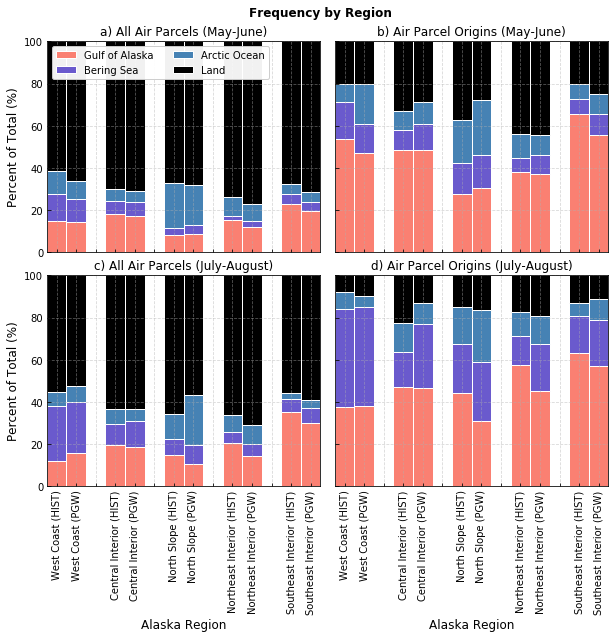

In [12]:
#%----------------------------------------------------------------------

fig = plt.figure(figsize=(8.,6.5))
fig.suptitle("Frequency by Region", fontsize=12, x=0.475, y=1.025, fontweight='bold')

#%----------------------------------------------------------------------

ax1 = fig.add_axes([0.0, 0.5, 0.475, 0.45]) 

ax1.set_title("a) All Air Parcels (May-June)")

ax1.bar([0,3,6,9,12], bars1_l_mj, color='salmon', edgecolor='white', 
        width=1, label='Gulf of Alaska')
ax1.bar([0,3,6,9,12], bars2_l_mj, bottom=bars1_l_mj, color='slateblue', edgecolor='white', 
        width=1, label='Bering Sea')
ax1.bar([0,3,6,9,12], bars3_l_mj, bottom=bars12_l_mj, color='steelblue', edgecolor='white', 
        width=1, label='Arctic Ocean')
ax1.bar([0,3,6,9,12], bars4_l_mj, bottom=bars13_l_mj, color='k', edgecolor='white', 
        width=1, label='Land')

ax1.bar([1,4,7,10,13], bars5_l_mj, color='salmon', edgecolor='white', width=1)
ax1.bar([1,4,7,10,13], bars6_l_mj, bottom=bars5_l_mj, color='slateblue', edgecolor='white', width=1)
ax1.bar([1,4,7,10,13], bars7_l_mj, bottom=bars56_l_mj, color='steelblue', edgecolor='white', width=1)
ax1.bar([1,4,7,10,13], bars8_l_mj, bottom=bars57_l_mj, color='k', edgecolor='white', width=1)

plt.legend(ncol=2, loc='upper left', framealpha=0.95)

ax1.set_xticks(np.arange(0,14))
ax1.set_xticklabels(names, rotation=90)
#ax1.set_xlabel("Alaska Region", fontsize=12)

ax1.set_ylabel("Percent of Total (%)", fontsize=12)

ax1.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=True, labelright=False)

ax1.grid(True, linestyle='--', alpha=0.5)
ax1.margins(x=0.,y=0.)

#%----------------------------------------------------------------------

ax2 = fig.add_axes([0.5, 0.5, 0.475, 0.45]) 

ax2.set_title("b) Air Parcel Origins (May-June)")

ax2.bar([0,3,6,9,12], bars1_r_mj, color='salmon', edgecolor='white', width=1, label='GOA')
ax2.bar([0,3,6,9,12], bars2_r_mj, bottom=bars1_r_mj, color='slateblue', edgecolor='white', width=1, label='BS')
ax2.bar([0,3,6,9,12], bars3_r_mj, bottom=bars12_r_mj, color='steelblue', edgecolor='white', width=1, label='AO')
ax2.bar([0,3,6,9,12], bars4_r_mj, bottom=bars13_r_mj, color='k', edgecolor='white', width=1, label='Land')

ax2.bar([1,4,7,10,13], bars5_r_mj, color='salmon', edgecolor='white', width=1)
ax2.bar([1,4,7,10,13], bars6_r_mj, bottom=bars5_r_mj, color='slateblue', edgecolor='white', width=1)
ax2.bar([1,4,7,10,13], bars7_r_mj, bottom=bars56_r_mj, color='steelblue', edgecolor='white', width=1)
ax2.bar([1,4,7,10,13], bars8_r_mj, bottom=bars57_r_mj, color='k', edgecolor='white', width=1)

ax2.set_xticks(np.arange(0,14))
ax2.set_xticklabels(names, rotation=90)
#ax2.set_xlabel("Alaska Region", fontsize=12)

#ax2.set_ylabel("Percent of Total (%)", fontsize=12)

ax2.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax2.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=False, labelright=False)

ax2.grid(True, linestyle='--', alpha=0.5)
ax2.margins(x=0.,y=0.)

#%----------------------------------------------------------------------

ax3 = fig.add_axes([0.0, 0.0, 0.475, 0.45]) 

ax3.set_title("c) All Air Parcels (July-August)")

ax3.bar([0,3,6,9,12], bars1_l_ja, color='salmon', edgecolor='white', width=1, label='GOA')
ax3.bar([0,3,6,9,12], bars2_l_ja, bottom=bars1_l_ja, color='slateblue', edgecolor='white', width=1, label='BS')
ax3.bar([0,3,6,9,12], bars3_l_ja, bottom=bars12_l_ja, color='steelblue', edgecolor='white', width=1, label='AO')
ax3.bar([0,3,6,9,12], bars4_l_ja, bottom=bars13_l_ja, color='k', edgecolor='white', width=1, label='Land')

ax3.bar([1,4,7,10,13], bars5_l_ja, color='salmon', edgecolor='white', width=1)
ax3.bar([1,4,7,10,13], bars6_l_ja, bottom=bars5_l_ja, color='slateblue', edgecolor='white', width=1)
ax3.bar([1,4,7,10,13], bars7_l_ja, bottom=bars56_l_ja, color='steelblue', edgecolor='white', width=1)
ax3.bar([1,4,7,10,13], bars8_l_ja, bottom=bars57_l_ja, color='k', edgecolor='white', width=1)

#plt.legend(ncol=2, loc='upper left', framealpha=0.9)

ax3.set_xticks(np.arange(0,14))
ax3.set_xticklabels(names, rotation=90)
ax3.set_xlabel("Alaska Region", fontsize=12)

ax3.set_ylabel("Percent of Total (%)", fontsize=12)

ax3.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax3.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=True, labelright=False)

ax3.grid(True, linestyle='--', alpha=0.5)
ax3.margins(x=0.,y=0.)

#%----------------------------------------------------------------------

ax4 = fig.add_axes([0.5, 0.0, 0.475, 0.45]) 

ax4.set_title("d) Air Parcel Origins (July-August)")

ax4.bar([0,3,6,9,12], bars1_r_ja, color='salmon', edgecolor='white', width=1, label='GOA')
ax4.bar([0,3,6,9,12], bars2_r_ja, bottom=bars1_r_ja, color='slateblue', edgecolor='white', width=1, label='BS')
ax4.bar([0,3,6,9,12], bars3_r_ja, bottom=bars12_r_ja, color='steelblue', edgecolor='white', width=1, label='AO')
ax4.bar([0,3,6,9,12], bars4_r_ja, bottom=bars13_r_ja, color='k', edgecolor='white', width=1, label='Land')

ax4.bar([1,4,7,10,13], bars5_r_ja, color='salmon', edgecolor='white', width=1)
ax4.bar([1,4,7,10,13], bars6_r_ja, bottom=bars5_r_ja, color='slateblue', edgecolor='white', width=1)
ax4.bar([1,4,7,10,13], bars7_r_ja, bottom=bars56_r_ja, color='steelblue', edgecolor='white', width=1)
ax4.bar([1,4,7,10,13], bars8_r_ja, bottom=bars57_r_ja, color='k', edgecolor='white', width=1)

ax4.set_xticks(np.arange(0,14))
ax4.set_xticklabels(names, rotation=90)
ax4.set_xlabel("Alaska Region", fontsize=12)

#ax2.set_ylabel("Percent of Total (%)", fontsize=12)

ax4.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax4.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=False, labelright=False)

ax4.grid(True, linestyle='--', alpha=0.5)
ax4.margins(x=0.,y=0.)

#%----------------------------------------------------------------------

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_bars.png", bbox_inches='tight', dpi=1200)
plt.show()

#%----------------------------------------------------------------------

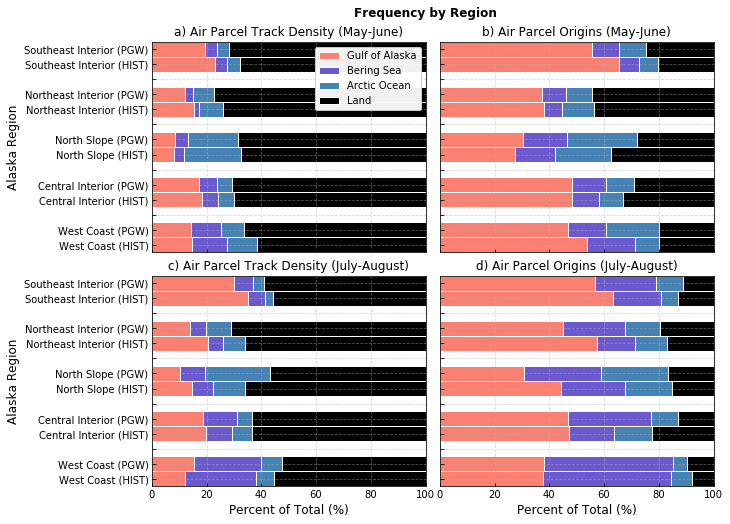

In [14]:
#%----------------------------------------------------------------------

fig = plt.figure(figsize=(8.,6.5))
fig.suptitle("Frequency by Region", fontsize=12, x=0.475, y=1.025, fontweight='bold')

#%----------------------------------------------------------------------

ax1 = fig.add_axes([0.0, 0.5, 0.475, 0.45]) 

ax1.set_title("a) Air Parcel Track Density (May-June)")

ax1.barh([0,3,6,9,12], bars1_l_mj, color='salmon', edgecolor='white', 
         height=1, label='Gulf of Alaska')
ax1.barh([0,3,6,9,12], bars2_l_mj, left=bars1_l_mj, color='slateblue', edgecolor='white', 
         height=1, label='Bering Sea')
ax1.barh([0,3,6,9,12], bars3_l_mj, left=bars12_l_mj, color='steelblue', edgecolor='white', 
         height=1, label='Arctic Ocean')
ax1.barh([0,3,6,9,12], bars4_l_mj, left=bars13_l_mj, color='k', edgecolor='white', 
         height=1, label='Land')

ax1.barh([1,4,7,10,13], bars5_l_mj, color='salmon', edgecolor='white', height=1)
ax1.barh([1,4,7,10,13], bars6_l_mj, left=bars5_l_mj, color='slateblue', edgecolor='white', height=1)
ax1.barh([1,4,7,10,13], bars7_l_mj, left=bars56_l_mj, color='steelblue', edgecolor='white', height=1)
ax1.barh([1,4,7,10,13], bars8_l_mj, left=bars57_l_mj, color='k', edgecolor='white', height=1)

plt.legend(ncol=1, loc='upper right', framealpha=0.95)

ax1.set_yticks(np.arange(0,14))
ax1.set_yticklabels(names)
ax1.set_ylabel("Alaska Region", fontsize=12)

#ax1.set_xlabel("Percent of Total (%)", fontsize=12)

ax1.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=True, labelright=False)

ax1.grid(True, linestyle='--', alpha=0.5)
ax1.margins(x=0.,y=0.)

#%----------------------------------------------------------------------

ax2 = fig.add_axes([0.5, 0.5, 0.475, 0.45]) 

ax2.set_title("b) Air Parcel Origins (May-June)")

ax2.barh([0,3,6,9,12], bars1_r_mj, color='salmon', edgecolor='white', height=1)
ax2.barh([0,3,6,9,12], bars2_r_mj, left=bars1_r_mj, color='slateblue', edgecolor='white', height=1)
ax2.barh([0,3,6,9,12], bars3_r_mj, left=bars12_r_mj, color='steelblue', edgecolor='white', height=1)
ax2.barh([0,3,6,9,12], bars4_r_mj, left=bars13_r_mj, color='k', edgecolor='white', height=1)

ax2.barh([1,4,7,10,13], bars5_r_mj, color='salmon', edgecolor='white', height=1)
ax2.barh([1,4,7,10,13], bars6_r_mj, left=bars5_r_mj, color='slateblue', edgecolor='white', height=1)
ax2.barh([1,4,7,10,13], bars7_r_mj, left=bars56_r_mj, color='steelblue', edgecolor='white', height=1)
ax2.barh([1,4,7,10,13], bars8_r_mj, left=bars57_r_mj, color='k', edgecolor='white', height=1)

ax2.set_yticks(np.arange(0,14))
ax2.set_yticklabels(names)
#ax2.set_ylabel("Alaska Region", fontsize=12)

#ax1.set_xlabel("Percent of Total (%)", fontsize=12)

ax2.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax2.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=False, labelright=False)

ax2.grid(True, linestyle='--', alpha=0.5)
ax2.margins(x=0.,y=0.)

#%----------------------------------------------------------------------

ax3 = fig.add_axes([0.0, 0.0, 0.475, 0.45]) 

ax3.set_title("c) Air Parcel Track Density (July-August)")

ax3.barh([0,3,6,9,12], bars1_l_ja, color='salmon', edgecolor='white', height=1)
ax3.barh([0,3,6,9,12], bars2_l_ja, left=bars1_l_ja, color='slateblue', edgecolor='white', height=1)
ax3.barh([0,3,6,9,12], bars3_l_ja, left=bars12_l_ja, color='steelblue', edgecolor='white', height=1)
ax3.barh([0,3,6,9,12], bars4_l_ja, left=bars13_l_ja, color='k', edgecolor='white', height=1)

ax3.barh([1,4,7,10,13], bars5_l_ja, color='salmon', edgecolor='white', height=1)
ax3.barh([1,4,7,10,13], bars6_l_ja, left=bars5_l_ja, color='slateblue', edgecolor='white', height=1)
ax3.barh([1,4,7,10,13], bars7_l_ja, left=bars56_l_ja, color='steelblue', edgecolor='white', height=1)
ax3.barh([1,4,7,10,13], bars8_l_ja, left=bars57_l_ja, color='k', edgecolor='white', height=1)

ax3.set_yticks(np.arange(0,14))
ax3.set_yticklabels(names)
ax3.set_ylabel("Alaska Region", fontsize=12)

ax3.set_xlabel("Percent of Total (%)", fontsize=12)

ax3.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax3.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=True, labelright=False)

ax3.grid(True, linestyle='--', alpha=0.5)
ax3.margins(x=0.,y=0.)

#%----------------------------------------------------------------------

ax4 = fig.add_axes([0.5, 0.0, 0.475, 0.45]) 

ax4.set_title("d) Air Parcel Origins (July-August)")

ax4.barh([0,3,6,9,12], bars1_r_ja, color='salmon', edgecolor='white', height=1)
ax4.barh([0,3,6,9,12], bars2_r_ja, left=bars1_r_ja, color='slateblue', edgecolor='white', height=1)
ax4.barh([0,3,6,9,12], bars3_r_ja, left=bars12_r_ja, color='steelblue', edgecolor='white', height=1)
ax4.barh([0,3,6,9,12], bars4_r_ja, left=bars13_r_ja, color='k', edgecolor='white', height=1)

ax4.barh([1,4,7,10,13], bars5_r_ja, color='salmon', edgecolor='white', height=1)
ax4.barh([1,4,7,10,13], bars6_r_ja, left=bars5_r_ja, color='slateblue', edgecolor='white', height=1)
ax4.barh([1,4,7,10,13], bars7_r_ja, left=bars56_r_ja, color='steelblue', edgecolor='white', height=1)
ax4.barh([1,4,7,10,13], bars8_r_ja, left=bars57_r_ja, color='k', edgecolor='white', height=1)

ax4.set_yticks(np.arange(0,14))
ax4.set_yticklabels(names)
#ax4.set_ylabel("Alaska Region", fontsize=12)

ax4.set_xlabel("Percent of Total (%)", fontsize=12)

ax4.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax4.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=False, labelright=False)

ax4.grid(True, linestyle='--', alpha=0.5)
ax4.margins(x=0.,y=0.)

#%----------------------------------------------------------------------

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_bars2.png", bbox_inches='tight', dpi=1200)
plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_bars2.pdf", bbox_inches='tight', dpi=1200)
plt.show()

#%----------------------------------------------------------------------